In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

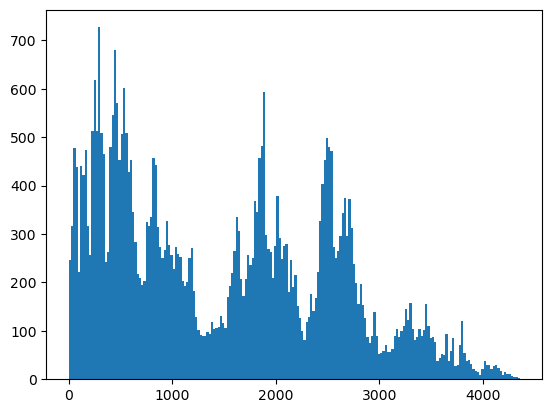

In [2]:
import math
import numpy as np
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy.stats import poisson
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tools.numdiff import approx_hess1, approx_hess2, approx_hess3
import pandas as pd

df = pd.read_csv('D:/data/Zircons/Roberts_Spencer_2015.csv')
ages = df["U-Pb (Ma)"]
data = plt.hist(ages, bins = 200)

In [3]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.1.2


In [4]:
zircons_data = data[0]
ages = data[1][1:]
print(len(ages))
print(max(ages))

200
4358.0


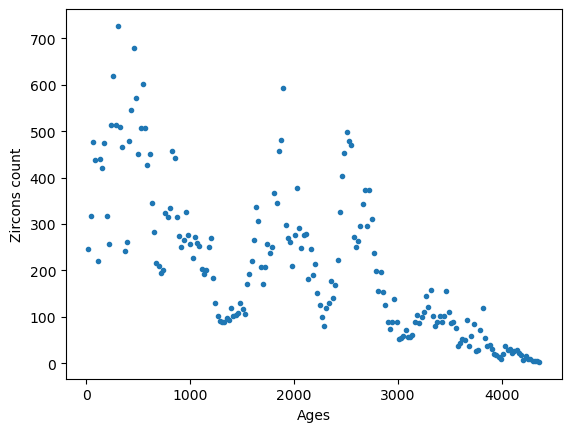

In [5]:
plt.plot(ages, zircons_data, "o", markersize=3, alpha=1)
plt.ylabel("Zircons count")
plt.xlabel("Ages");

In [6]:
tr =pm.distributions.transforms

Order = tr.Ordered()

#Logodd = tr.LogOddsTransform()

#chain_tran = tr.Chain([Logodd, Order])

k = 5

In [7]:
with pm.Model() as model:
    
    k =8
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr100000 = pm.sample(draws =80000,tune = 20000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 20_000 tune and 80_000 draw iterations (40_000 + 160_000 draws total) took 33917 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],174.647,115.984,5.528,292.404,81.566,69.103,3.0,12.0,2.24
rates[1],440.201,18.403,419.495,461.948,12.965,10.970,2.0,16.0,2.42
rates[2],279.016,5.317,268.806,288.210,2.968,2.326,3.0,30.0,1.70
rates[3],186.391,18.569,165.211,206.624,13.072,11.066,3.0,33.0,1.86
rates[4],316.888,7.907,304.924,329.270,5.221,4.311,3.0,21.0,2.17
rates[5],163.125,84.444,75.498,251.433,59.689,50.579,3.0,69.0,1.84
rates[6],87.253,13.732,70.249,103.644,9.627,8.138,3.0,61.0,1.85
rates[7],67.165,15.841,48.513,84.116,11.165,9.463,3.0,22.0,1.97
rates[8],17.591,1.392,15.147,20.046,0.793,0.625,3.0,39.0,1.63
switchpoints[0],71.804,54.175,0.902,128.114,38.213,32.435,2.0,11.0,2.82


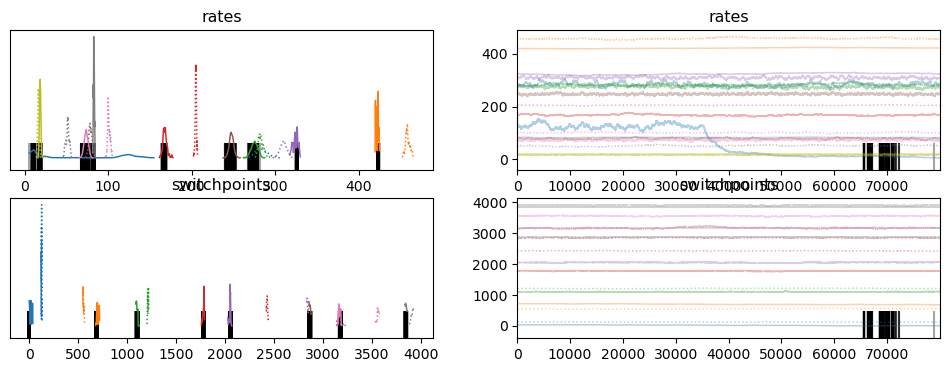

In [8]:
with model:
    az.plot_trace(tr100000)
    
pm.summary(tr100000)

In [16]:
with pm.Model() as model:
    
    k =8
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr150000 = pm.sample(draws =1000,tune = 1000, cores = 4)

In [ ]:
with model:
    az.plot_trace(tr150000)
    
pm.summary(tr150000)